In [ ]:
!pip install pycaret[full]

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 60.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to deter

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
import pandas as pd
housing_data = pd.read_csv('/content/house_price_regression_dataset.csv')

In [ ]:
from pycaret.regression import *
setup_regression = setup(housing_data, target = 'House_Price', session_id = 987)

,Description,Value
0,Session id,987
1,Target,House_Price
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(700, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.regression import RegressionExperiment
regression_experiment = RegressionExperiment()

In [ ]:
regression_experiment.setup(housing_data, target = 'House_Price', session_id = 987)

,Description,Value
0,Session id,987
1,Target,House_Price
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(700, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
top_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,7863.4802,97946039.9769,9866.9436,0.9984,0.0229,0.0159,0.7740
lasso,Lasso Regression,7863.4962,97945993.5143,9866.9506,0.9984,0.0229,0.0159,0.0230
ridge,Ridge Regression,7863.5986,97943149.9716,9866.9628,0.9984,0.0229,0.0159,0.0250
lar,Least Angle Regression,7863.4802,97946039.9769,9866.9436,0.9984,0.0229,0.0159,0.0300
llar,Lasso Least Angle Regression,7863.4961,97945994.8862,9866.9507,0.9984,0.0229,0.0159,0.0370
br,Bayesian Ridge,7863.9495,97944308.4349,9867.1119,0.9984,0.0229,0.0159,0.0260
en,Elastic Net,9456.3959,137781809.9516,11729.9310,0.9977,0.0263,0.0189,0.0240
catboost,CatBoost Regressor,10494.8253,193302746.5383,13826.7385,0.9968,0.0359,0.0229,1.5520
gbr,Gradient Boosting Regressor,12793.5034,251392583.3119,15803.4434,0.9959,0.0375,0.0265,0.1360
lightgbm,Light Gradient Boosting Machine,12882.0719,261340031.0113,16101.5718,0.9957,0.0393,0.0269,0.2930


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
regressor = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11475.7576,238033280.8644,15428.3272,0.9967,0.0347,0.0233
1,10413.8676,165669254.5262,12871.2569,0.9972,0.0360,0.0242
2,10949.8971,214433188.0943,14643.5374,0.9971,0.0333,0.0232
3,10399.4851,172206344.6300,13122.7415,0.9975,0.0302,0.0214
4,9869.4965,135915184.2161,11658.2668,0.9979,0.0329,0.0237
5,10692.4554,179289645.2230,13389.9083,0.9967,0.0259,0.0203
6,11105.7217,204982607.3897,14317.2137,0.9967,0.0576,0.0307
7,10201.5633,229699692.1626,15155.8468,0.9956,0.0641,0.0288
8,9161.1530,135442296.5111,11637.9679,0.9973,0.0230,0.0166


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

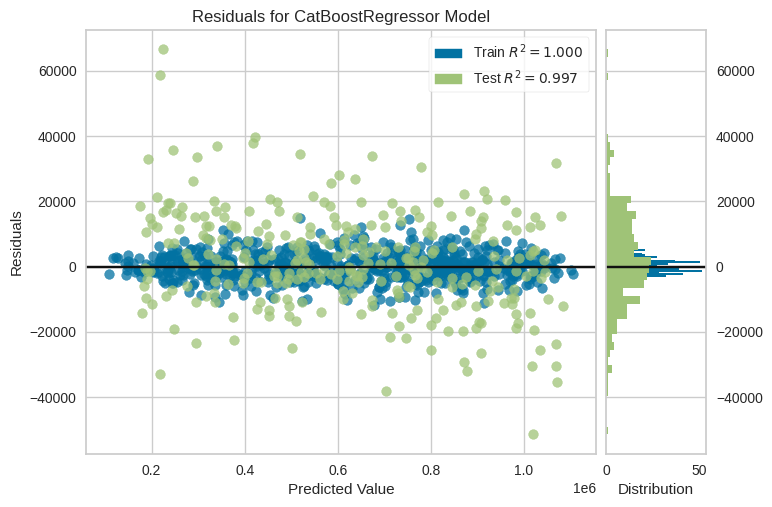

In [ ]:
plot_model(regressor, plot = 'residuals')

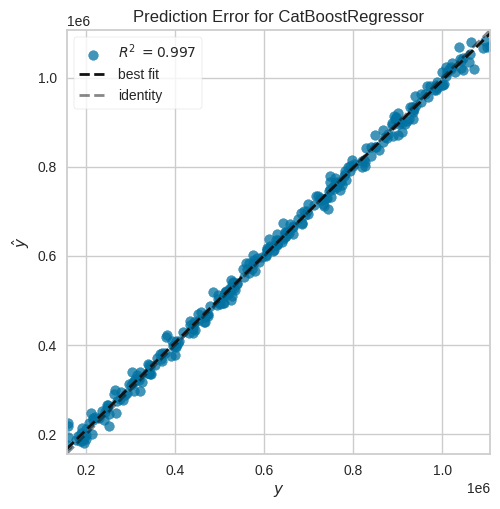

In [ ]:
plot_model(regressor, plot = 'error')

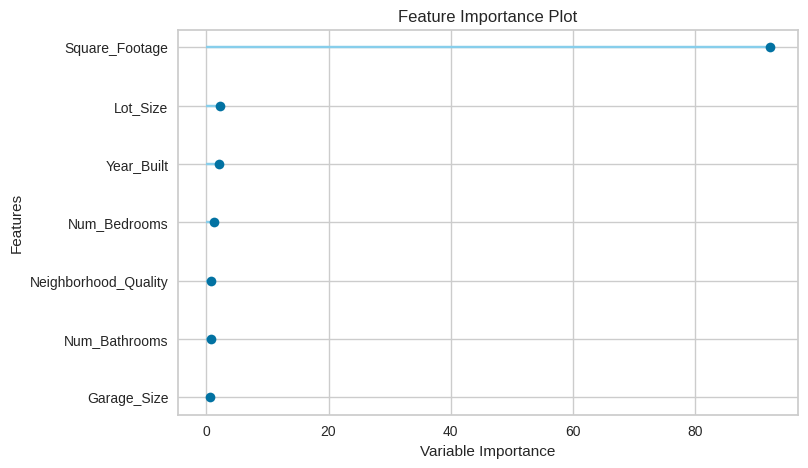

In [ ]:
plot_model(regressor, plot = 'feature')

In [ ]:
evaluate_model(regressor)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
test_predictions = predict_model(regressor)
test_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,11585.0789,231860825.1323,15226.9769,0.9965,0.0444,0.0262


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,prediction_label
851,1314,5,1,1972,3.998550,2,5,341956.28125,350400.425007
615,2628,4,2,1987,2.498519,0,4,576020.06250,591204.113440
545,4275,4,3,1959,3.276248,0,4,896792.56250,912038.890246
98,1370,2,2,1973,3.148272,1,4,304730.50000,317035.580943
642,1171,3,1,1958,0.693736,1,6,206781.75000,223412.304440


In [ ]:
copied_housing_data = housing_data.copy()
copied_housing_data.drop('House_Price', axis=1, inplace=True)
copied_housing_data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


In [ ]:
model_output = predict_model(regressor, data = copied_housing_data)
model_output.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,prediction_label
0,1360,2,1,1981,0.599637,0,5,2.644525e+05
1,4272,3,3,2016,4.753014,1,6,9.783471e+05
2,3592,1,2,2016,3.634823,0,9,7.773853e+05
3,966,1,2,1977,2.730667,1,8,2.252218e+05
4,4926,2,1,1993,4.699072,0,8,1.022263e+06


In [ ]:
save_model(regressor, 'regression_pipeline_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                              'Num_Bathrooms', 'Year_Built',
                                              'Lot_Size', 'Garage_Size',
                                              'Neighborhood_Quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7aa2e51573d0>)]),
 'regression_pipeline_model.pkl')

In [ ]:
loaded_pipeline_model = load_model('regression_pipeline_model')
loaded_pipeline_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                             'Num_Bathrooms', 'Year_Built',
                                             'Lot_Size', 'Garage_Size',
                                             'Neighborhood_Quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7aa2e5202890>)])

In [ ]:
create_app(regressor)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c47c6e85ea6705fb53.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [ ]:
s = setup(data, target = 'House_Price', session_id = 123)

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# check all available config
get_config()

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [ ]:
# init setup with normalize = True
s = setup(data, target = 'House_Price', session_id = 123,
          normalize = True, normalize_method = 'minmax')

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Garage_Size'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

In [ ]:
get_config('X_train')['Garage_Size'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
best = compare_models()

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

In [ ]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [ ]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

In [ ]:
# list of top 3 models by MAE
best_mae_models_top3

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [ ]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# check all the available models
models()

In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

In [ ]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

In [ ]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# train a dt model with default params
dt = create_model('dt')

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [ ]:
dt

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

In [ ]:
# model object
tuned_dt

In [ ]:
# tuner object
tuner

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# top 3 models based on mae
best_mae_models_top3

In [ ]:
# blend top 3 models
blend_models(best_mae_models_top3)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# stack models
stack_models(best_mae_models_top3)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

In [ ]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
# find best model based on CV metrics
automl()

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

## ✅Create App
This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_first_api')

In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)